# Case Study : House Prices 

In [25]:
import pandas as pd
import numpy as np
from scipy import stats 
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-poster')
import seaborn as sns
%matplotlib inline

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation , StandardScaler

In [27]:
housing_price = pd.read_csv(r'C:\Users\SHIVAM-PC\Desktop\AnalytixLabs\Bangalore Batch\BA CLASSES 3-4 Files\Case Study - Housing Example\House_Prices.csv')

In [28]:
housing_price

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [29]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [30]:
housing_price.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

 > #### As we can see, there are no missing values in the dataset. 

In [31]:
housing_price.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


> #### So we have all the numerical calculations with us, now we'll split the data into numerical and categorical

In [32]:
a = dict(housing_price.dtypes)
a

{'Bathrooms': dtype('int64'),
 'Bedrooms': dtype('int64'),
 'Brick': dtype('O'),
 'Home': dtype('int64'),
 'Neighborhood': dtype('O'),
 'Offers': dtype('int64'),
 'Price': dtype('int64'),
 'SqFt': dtype('int64')}

In [33]:
num_colnames = [key for key in a if a[key] in ['float64' , 'int64' , 'float32' , 'int32']]
cat_colnames = [key for key in a if a[key] in['O']]

In [34]:
house_price_num = housing_price[num_colnames]
house_price_cat = housing_price[cat_colnames]

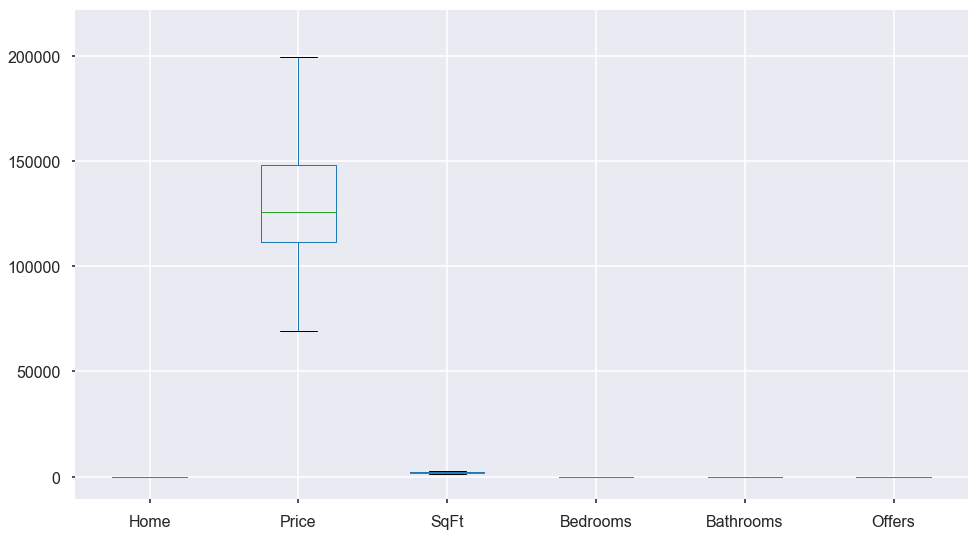

In [35]:
fig = plt.figure(1 , figsize = (16,9))
ax = fig.add_subplot(111)
house_price_num.plot(kind ='box' , ax=ax )

## <font color = mediumpurple> Data Audit Report : </font>

In [36]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min() ,x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [37]:
num_summary = house_price_num.apply(var_summary)
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,37.094474,1.376000e+03,1.0,2.27,7.35,13.7,32.75,64.5,96.25,115.3,121.65,126.73,128.0
Price,128.0,0.0,16694700.0,130427.343750,125950.0,26868.770371,7.219308e+08,69100.0,81570.00,91310.00,102020.0,111325.00,125950.0,148250.00,166560.0,179465.00,196476.00,211200.0
SqFt,128.0,0.0,256120.0,2000.937500,2000.0,211.572431,4.476289e+04,1450.0,1530.80,1664.00,1720.0,1880.00,2000.0,2140.00,2250.0,2368.00,2505.70,2590.0
Bedrooms,128.0,0.0,387.0,3.023438,3.0,0.725951,5.270054e-01,2.0,2.00,2.00,2.0,3.00,3.0,3.00,4.0,4.00,4.73,5.0
Bathrooms,128.0,0.0,313.0,2.445312,2.0,0.514492,2.647023e-01,2.0,2.00,2.00,2.0,2.00,2.0,3.00,3.0,3.00,3.00,4.0
Offers,128.0,0.0,330.0,2.578125,3.0,1.069324,1.143455e+00,1.0,1.00,1.00,1.0,2.00,3.0,3.00,4.0,4.00,5.00,6.0


In [38]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return(x)
house_price_num = house_price_num.apply(outlier_capping)
num_summary = house_price_num.apply(var_summary)
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Home,128.0,0.0,8256.0,64.500000,64.5,36.498109,1.332112e+03,7.35,7.35,7.5775,13.7,32.75,64.5,96.25,115.3,121.4225,121.65,121.65
Price,128.0,0.0,16667725.0,130216.601562,125950.0,24738.048255,6.119710e+08,91310.00,91310.00,91446.5000,102020.0,111325.00,125950.0,148250.00,166560.0,178532.2500,179465.00,179465.00
SqFt,128.0,0.0,256064.0,2000.500000,2000.0,190.540218,3.630557e+04,1664.00,1664.00,1673.1000,1720.0,1880.00,2000.0,2140.00,2250.0,2340.7000,2368.00,2368.00
Bedrooms,128.0,0.0,385.0,3.007812,3.0,0.693003,4.802534e-01,2.00,2.00,2.0000,2.0,3.00,3.0,3.00,4.0,4.0000,4.00,4.00
Bathrooms,128.0,0.0,312.0,2.437500,2.0,0.498028,2.480315e-01,2.00,2.00,2.0000,2.0,2.00,2.0,3.00,3.0,3.0000,3.00,3.00
Offers,128.0,0.0,325.0,2.539062,3.0,0.987340,9.748401e-01,1.00,1.00,1.0000,1.0,2.00,3.0,3.00,4.0,4.0000,4.00,4.00


In [39]:
pandas_profiling.ProfileReport(housing_price)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.6 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [40]:
house_price_cat.columns

Index(['Brick', 'Neighborhood'], dtype='object')

In [41]:
# function for creating dummies of categorical data :

def create_dummies(df , colname):
    col_dummies = pd.get_dummies(df[colname] , prefix = colname)
    col_dummies.drop(col_dummies.columns[0] , axis = 1 , inplace = True)
    df = pd.concat([df , col_dummies] , axis =1)
    df.drop(colname, axis=1 ,inplace =True)
    return (df)
for c_feature in ['Brick' , 'Neighborhood']:
    house_price_cat[c_feature] = house_price_cat[c_feature].astype('category')
    house_price_cat = create_dummies(house_price_cat , c_feature)
    

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
house_price_cat

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,1,0,1
7,0,0,1
8,0,0,0
9,0,0,0


In [44]:
# concatenating numerical and categorical data(dummy data )
house_price_final = pd.concat([house_price_num, house_price_cat] ,axis=1)
house_price_final


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,7.35,114300.0,1790.0,2.0,2.0,2.0,0,0,0
1,7.35,114200.0,2030.0,4.0,2.0,3.0,0,0,0
2,7.35,114800.0,1740.0,3.0,2.0,1.0,0,0,0
3,7.35,94700.0,1980.0,3.0,2.0,3.0,0,0,0
4,7.35,119800.0,2130.0,3.0,3.0,3.0,0,0,0
5,7.35,114600.0,1780.0,3.0,2.0,2.0,0,1,0
6,7.35,151600.0,1830.0,3.0,3.0,3.0,1,0,1
7,8.00,150700.0,2160.0,4.0,2.0,2.0,0,0,1
8,9.00,119200.0,2110.0,4.0,2.0,3.0,0,0,0
9,10.00,104000.0,1730.0,3.0,3.0,3.0,0,0,0


***

## <font color = 'mediumpurple'> Assumptions check for Linear Regression : </font>

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


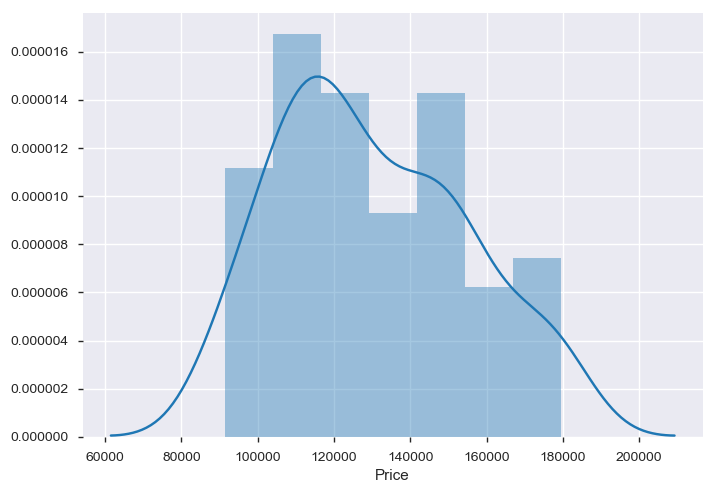

In [45]:
# Distribution of dependent variable => Y and in this case our Y is Price.
sns.distplot(house_price_final['Price'])

> As Y is not normally distributed, so we'll apply a log transformation on our Y variable to convert it into normal.

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


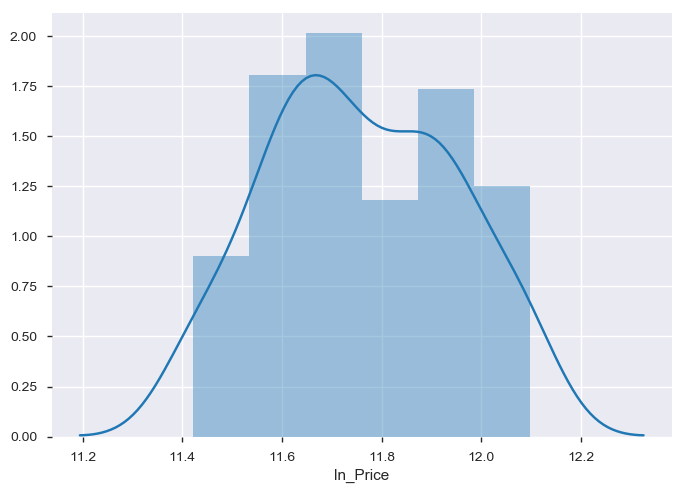

In [46]:
house_price_final['ln_Price'] =np.log(house_price_final['Price'])
house_price_final = house_price_final.drop(['Price'], axis =1)

sns.distplot(house_price_final['ln_Price'])

### Correlation between X and Y variables :

In [47]:
def linear_relations(x):
    log_x = np.log(x+1)
    exp_x = np.exp(x) 
    sqrt_x = np.sqrt(x)
    square_x = x*x
    coeff = np.corrcoef(house_price_final['ln_Price'] , x)[1][0]
    log_coeff = np.corrcoef(house_price_final['ln_Price'] , log_x)[1][0]
    exp_coeff = np.corrcoef(house_price_final['ln_Price'] , exp_x)[1][0]
    sqrt_coeff = np.corrcoef(house_price_final['ln_Price'] , sqrt_x)[1][0]
    square_coeff = np.corrcoef(house_price_final['ln_Price'] , square_x)[1][0]
    return (pd.Series([coeff,log_coeff, sqrt_coeff, exp_coeff, square_coeff], 
                  index=['coeff','log_coeff', 'sqrt_coeff', 'exp_coeff', 'square_coeff']))

In [48]:
house_price_final.apply(linear_relations).T

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3087: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


,coeff,log_coeff,sqrt_coeff,exp_coeff,square_coeff
Home,0.094014,0.121037,0.109973,-0.012855,0.059848
SqFt,0.548642,0.548948,0.548962,NaN,0.546986
Bedrooms,0.505683,0.488916,0.494821,0.530622,0.521294
Bathrooms,0.499974,0.499974,0.499974,0.499974,0.499974
Offers,-0.315466,-0.318334,-0.318252,-0.271590,-0.301838
Brick_Yes,0.440044,0.440044,0.440044,0.440044,0.440044
Neighborhood_North,-0.571494,-0.571494,-0.571494,-0.571494,-0.571494
Neighborhood_West,0.708137,0.708137,0.708137,0.708137,0.708137
ln_Price,1.000000,0.999970,0.999991,0.995273,0.999965


> As 'Home' is just HomeID , it should not be having any effect in predicting the Price of house. So we'll drop 'Home'

In [49]:
house_price_final.corr()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,ln_Price
Home,1.000000,0.180766,-0.079430,0.104809,-0.058013,0.034921,0.046444,0.024978,0.094014
SqFt,0.180766,1.000000,0.464021,0.522587,0.335402,0.102660,-0.275426,0.234533,0.548642
Bedrooms,-0.079430,0.464021,1.000000,0.377862,0.131891,0.016195,-0.365623,0.484288,0.505683
Bathrooms,0.104809,0.522587,0.377862,1.000000,0.189155,0.155127,-0.273551,0.271585,0.499974
Offers,-0.058013,0.335402,0.131891,0.189155,1.000000,-0.146187,0.322482,-0.328321,-0.315466
Brick_Yes,0.034921,0.102660,0.016195,0.155127,-0.146187,1.000000,-0.260554,0.115793,0.440044
Neighborhood_North,0.046444,-0.275426,-0.365623,-0.273551,0.322482,-0.260554,1.000000,-0.479098,-0.571494
Neighborhood_West,0.024978,0.234533,0.484288,0.271585,-0.328321,0.115793,-0.479098,1.000000,0.708137
ln_Price,0.094014,0.548642,0.505683,0.499974,-0.315466,0.440044,-0.571494,0.708137,1.000000


> As we can see that there are a lot of x_variables which are highly correlated to each other i.e multicollinearity. So we will filter our x variables by using OLS algorithm.

***

### Building Model :

In [62]:
# splitting data into train and test

train , test = train_test_split(house_price_final , test_size= 0.3 , random_state = 123)

In [63]:
train.columns

Index(['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West', 'ln_Price'],
      dtype='object')

In [64]:
X_variables = '+'.join(train.columns.difference(['ln_Price']))
X_variables

'Bathrooms+Bedrooms+Brick_Yes+Home+Neighborhood_North+Neighborhood_West+Offers+SqFt'

In [65]:
# creating formula that will be used in OLS algorithm.
my_formula = 'ln_Price~'+X_variables
my_formula

'ln_Price~Bathrooms+Bedrooms+Brick_Yes+Home+Neighborhood_North+Neighborhood_West+Offers+SqFt'

In [66]:
import statsmodels.formula.api as smf

In [67]:
lm = smf.ols(formula = my_formula , data = train).fit()

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     58.80
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           2.45e-30
Time:                        03:52:12   Log-Likelihood:                 108.43
No. Observations:                  89   AIC:                            -198.9
Df Residuals:                      80   BIC:                            -176.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.7463      0

In [69]:
# deleting non significant variable one by one and get to the final result

my_formula = 'ln_Price~Brick_Yes+Neighborhood_West+SqFt'
train = train[['ln_Price','Brick_Yes' , 'Neighborhood_West' , 'SqFt']]

In [70]:
lm = smf.ols(formula = my_formula , data = train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     89.14
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           3.65e-26
Time:                        03:52:13   Log-Likelihood:                 85.892
No. Observations:                  89   AIC:                            -163.8
Df Residuals:                      85   BIC:                            -153.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.8540      0.10

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [72]:
y, X = dmatrices(my_formula, train, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,111.6,Intercept
1,1.0,Brick_Yes
2,1.0,Neighborhood_West
3,1.0,SqFt


> As VIF is 1 for all the variable, now its good to train our model.

In [75]:
# predicting price for train dataset.

train['pred_Price'] = lm.predict(train)

In [76]:
# predicting price for test dataset.

test['pred_Price'] = lm.predict(test)

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
test

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,ln_Price,pred_Price
4,7.35,2130.0,3.0,3.0,3.0,0,0,0,11.693579,11.678202
123,121.65,1900.0,3.0,3.0,3.0,1,0,0,11.692744,11.733746
90,91.00,1920.0,4.0,2.0,2.0,0,0,1,11.871299,11.849769
82,83.00,2050.0,2.0,2.0,1.0,1,0,1,12.012488,12.044614
42,43.00,1990.0,2.0,2.0,3.0,0,0,0,11.567414,11.624029
28,29.00,1664.0,2.0,2.0,3.0,0,1,0,11.422016,11.497885
29,30.00,2040.0,4.0,3.0,1.0,1,0,1,12.097735,12.040744
111,112.00,1740.0,2.0,2.0,2.0,0,1,0,11.651817,11.527293
95,96.00,1970.0,2.0,2.0,1.0,1,0,1,11.934920,12.013658
33,34.00,2280.0,4.0,3.0,4.0,1,0,0,11.846536,11.880785


In [78]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test.ln_Price, test.pred_Price))
print('MSE:', metrics.mean_squared_error(test.ln_Price, test.pred_Price))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_Price, test.pred_Price)))
print('R-Squre:', metrics.r2_score(test.ln_Price, test.pred_Price))
print('corr between actual & pred:', np.corrcoef(test.ln_Price, test.pred_Price)[1][0])

MAE: 0.0724615740831
MSE: 0.00834215009711
RMSE: 0.0913353715551
R-Squre: 0.732008673526
corr between actual & pred: 0.885466873083


> #### R^2 value is 73.2 %, so we can say that our model is quite accurate in predicting house prices.

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


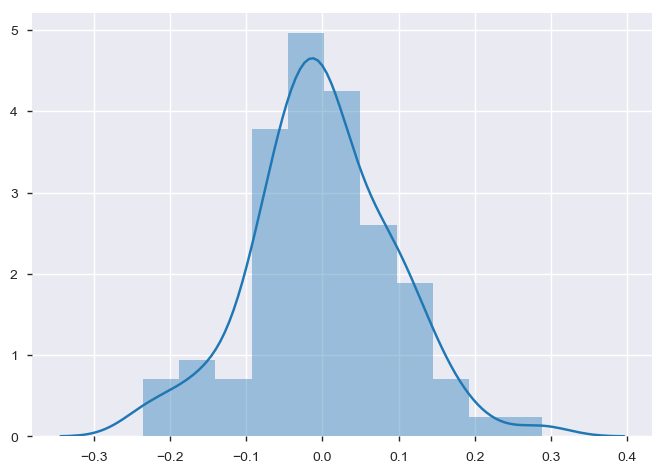

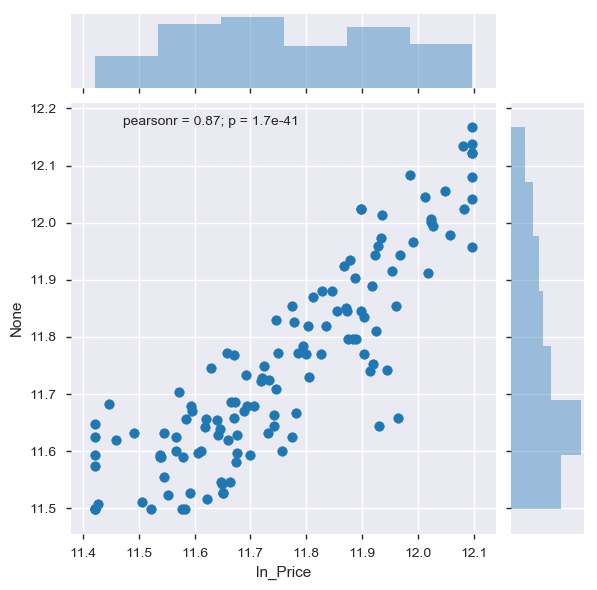

In [80]:
sns.distplot(lm.resid)

sns.jointplot(house_price_final.ln_Price, lm.predict(house_price_final) )

> As the residuals show a normal distribution, it means that our model worked quite well on dataset we prepared.

***